In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1 Descriptive Statistics

In [2]:
df = pd.read_csv("consumer_complaints.csv")

/var/folders/tm/cclhk5g57cb0tkysh8pv5mvr0000gn/T/ipykernel_32818/927148996.py:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("consumer_complaints.csv")


In [3]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

'date_received' and 'date_sent_to_company' should be in datatime format instead of object

In [6]:
df.shape

(555957, 18)

In [7]:
df.nunique()

date_received                     1608
product                             11
sub_product                         46
issue                               95
sub_issue                           68
consumer_complaint_narrative     65646
company_public_response             10
company                           3605
state                               62
zipcode                          27052
tags                                 3
consumer_consent_provided            4
submitted_via                        6
date_sent_to_company              1557
company_response_to_consumer         8
timely_response                      2
consumer_disputed?                   2
complaint_id                    555957
dtype: int64

In [8]:
df.isna().sum()

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
missing_percentage = round((df.isna().sum()/len(df)*100),2).sort_values(ascending=False)

Text(0.5, 1.0, 'Percentage of missing values in each variable')

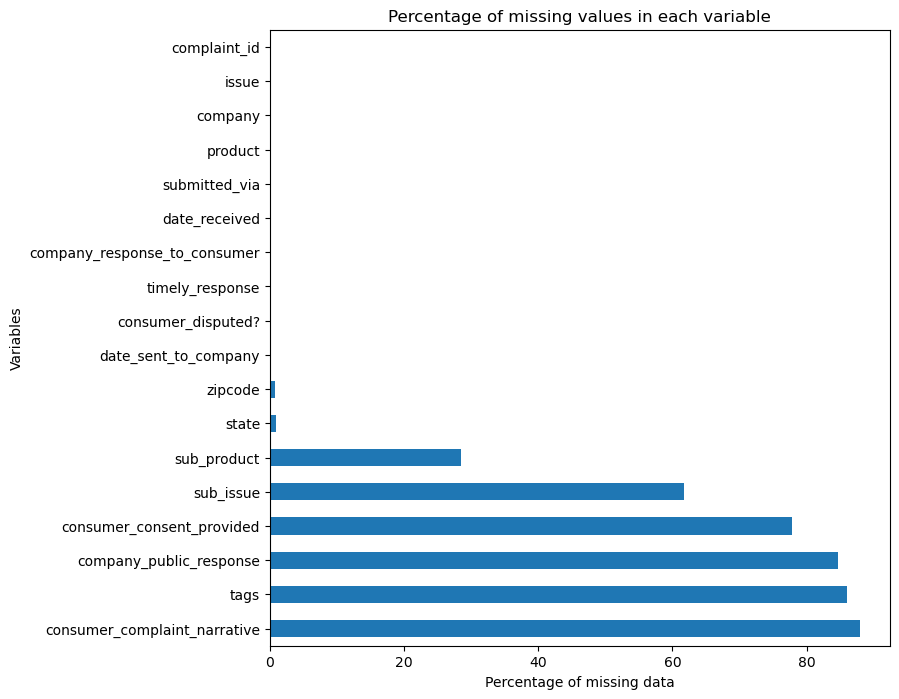

In [14]:
# Graph showing the percentage of missing data
plt.figure(figsize=(8,8))
missing_percentage.plot(kind='barh')
plt.xlabel('Percentage of missing data')
plt.ylabel('Variables')
plt.title('Percentage of missing values in each variable')

In [15]:
df['product'].unique()

array(['Mortgage', 'Credit reporting', 'Student loan', 'Debt collection',
       'Credit card', 'Bank account or service', 'Consumer Loan',
       'Money transfers', 'Payday loan', 'Prepaid card',
       'Other financial service'], dtype=object)